In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.optimize import curve_fit
from matplotlib import rcParams

rcParams['figure.dpi']=150

## Comprobación ciclo hitéresis

In [2]:
# Puesto que vamos a realizar un estudio de la emisión de radiciación en
# nucleos radiactivos, necesitaremos asegurarnos de que el comportamiento
# del detector al cambiar la polaridad del campo B( ya que para la 
# desintegración beta- se emitirá un electrón mientras que para la 
# desintegración beta+ se emitirá un positrón) será el mismo y no variará
#el resultado de nuestras medidas.

In [3]:
# Cargamos los datos para los pares I-B:

#Pares Intensidad (A) y campo magnético B-(mT):
datos_neg = np.loadtxt('I_Bneg.txt', comments='%')

I_neg = datos_neg[:,0]
B_neg = datos_neg[:,1]

#Pares Intensidad (A) y campo magnético B-(mT):
datos_pos = np.loadtxt('I_Bpos.txt', comments='%')

I_pos = datos_pos[:,0]
B_pos = datos_pos[:,1]

# En cuanto al error del campo magnético me decido por tomar 
# una incertidumbre estandar u(B)=4 [mT] debido a variaciones en el contador
u_B = 4

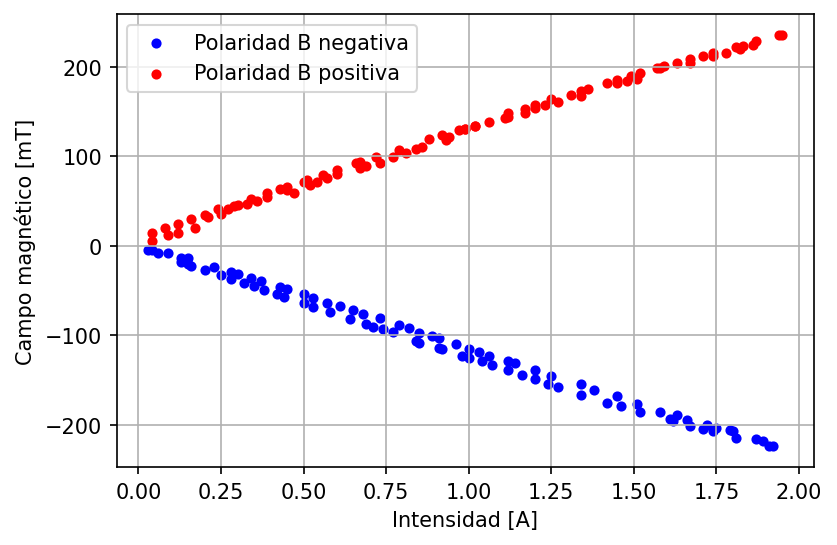

In [4]:
# Grafiquemos para ver como se comportan nuestros datos:

plt.scatter(I_neg,B_neg,s=15, c='b', label='Polaridad B negativa')
plt.scatter(I_pos,B_pos,s=15, c='r', label='Polaridad B positiva')

plt.xlabel('Intensidad [A]')
plt.ylabel('Campo magnético [mT]')

plt.grid()

plt.legend()
plt.show()

In [5]:
# Analicemos mediante un ajuste el comportamiento de ambas tomas:
def campo(x,a,b):
    return (a*x) + b

In [6]:
# Ajuste intensidad (A) y campo magnético B-(mT):
popt, pcov = curve_fit(campo, I_neg, B_neg)
perr = np.sqrt(np.diag(pcov))

In [7]:
pendiente_neg = popt[0]
indep_neg = popt[1]
s_pendiente_neg = perr[0]
s_indep_neg = perr[1]

print(pendiente_neg)
print(s_pendiente_neg)
print(indep_neg)
print(s_indep_neg)

-117.81317637156944
0.9038368753323994
-0.7465627906972038
0.9719327354509933


In [8]:
# Ajuste intensidad (A) y campo magnético B+(mT):
popt, pcov = curve_fit(campo, I_pos, B_pos)
perr = np.sqrt(np.diag(pcov))

In [9]:
pendiente_pos = popt[0]
indep_pos = popt[1]
s_pendiente_pos = perr[0]
s_indep_pos = perr[1]

print(pendiente_pos)
print(s_pendiente_pos)
print(indep_pos)
print(s_indep_pos)

119.09906771671857
0.6999535154660704
9.477922859531239
0.7655797506288388


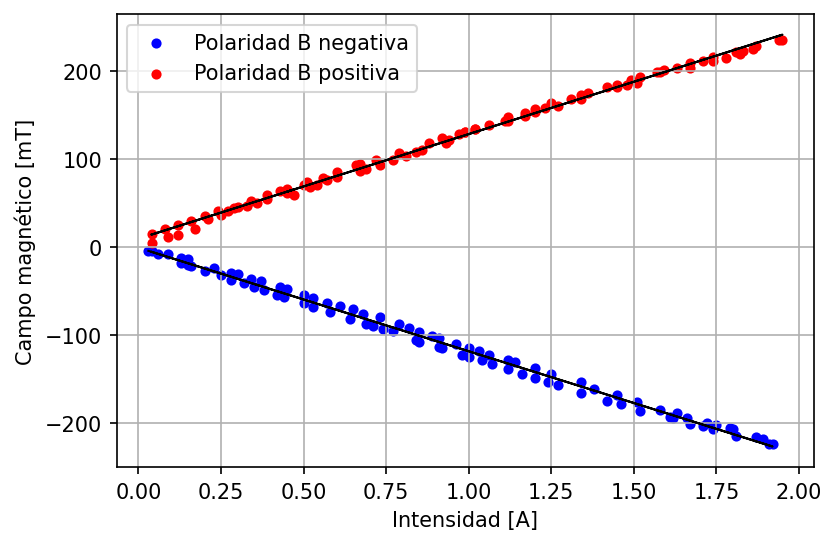

In [10]:
# Grafiquemos para ver como ajustan:

plt.scatter(I_neg,B_neg,s=15, c='b', label='Polaridad B negativa')
plt.scatter(I_pos,B_pos,s=15, c='r', label='Polaridad B positiva')

plt.plot(I_neg, campo(I_neg,pendiente_neg,indep_neg),'black',linewidth=1)
plt.plot(I_pos, campo(I_pos,pendiente_pos,indep_pos),'black',linewidth=1)


plt.xlabel('Intensidad [A]')
plt.ylabel('Campo magnético [mT]')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Realicemos un Test X^2 para determinar el nivel de confianza de la
# relacion B=a*I + b asociado a nuestros datos:


def chi(y,x,a,b,s):
    return (1/s**2)*sum((y - (a*x) - b)**2)

In [12]:
#Pares Intensidad (A) y campo magnético B-(mT):

X_neg = chi(B_neg,I_neg,pendiente_neg,indep_neg,u_B)

print(X_neg)

122.60624561847769


In [13]:
#Pares Intensidad (A) y campo magnético B+(mT):

X_pos = chi(B_pos,I_pos,pendiente_pos,indep_pos,u_B)

print(X_pos)

76.26814871872158


## Caracterización del tiempo muerto del detector

In [14]:
#Cargamos los datos del número de cuentas y tiempo para el calculo del
#tiempo muerto del detector:

circ_d = np.loadtxt('circ_d.txt', comments='%')
circ_i = np.loadtxt('circ_i.txt', comments='%')
circ_c = np.loadtxt('circ_c.txt', comments='%')

#Toma 1
cuentas_d = circ_d[:,0]
tiempo_d = circ_d[:,1]

#Toma 2
cuentas_i = circ_i[:,0]
tiempo_i = circ_i[:,1]

#Toma 3
cuentas_c = circ_c[:,0]
tiempo_c = circ_c[:,1]

#Datos de la radiacion de fondo

rad_fondo = np.loadtxt('rad_fondo.txt', comments='%')
cuentas_fondo = rad_fondo[0]
tiempo_fondo = rad_fondo[1]

In [15]:
#Calculamos el numero de cuentas por segundo para cada toma:

#Toma 1
cuentas_s_d = cuentas_d / tiempo_d

#Toma 2
cuentas_s_i = cuentas_i / tiempo_i

#Toma 3
cuentas_s_c = cuentas_c / tiempo_c

#Radiacion de fondo
cuentas_s_fondo = cuentas_fondo / tiempo_fondo
print(cuentas_s_fondo)

0.3721002560271911


In [16]:
#Calculamos el tiempo muerto:

def a(i,j,k):
    return i*j - k*0.3721002560271911

def b(i,j,k):
    return i*j*(k+0.3721002560271911) - (0.3721002560271911)*k*(i+j)

def c(i,j,k,l,m):
    return (i+j-k-(0.3721002560271911))*(l/(m**2))

def t(i,j,k):
    return (i/j)*(1- np.sqrt(1-k))

In [17]:
#Factores ecuacion cuadratica:
a = a(cuentas_s_d,cuentas_s_i,cuentas_s_c)
b = b(cuentas_s_d,cuentas_s_i,cuentas_s_c)
c = c(cuentas_s_d,cuentas_s_i,cuentas_s_c,b,a)
tiempo_muerto = t(a,b,c)
print(tiempo_muerto)

[0.00033359 0.0007173  0.00070952 0.00068622 0.00046593]


In [18]:
# Calculemos la incertidumbre:
# Para la incertidumbre del numero de cuentas tenemos s_N = raiz(N) [cuentas]
# Para la incertidumbre en la medida del tiempo he tomado el tiempo
# medio de reacción en un conductor (reacción a estímulo visual con 
# posterior acción táctil) s_t = 0.75 [s]
# Haciendo uso de la ley de propagación de incertidumbres tenemos:

#Incertidumbre tiempo :
s_t = 0.75

def incert_cuentas(i):
    return np.sqrt(i)


In [19]:
#Calculamos la incertidumbre del numero de cuentas para cada toma:

#Toma 1
s_cuentas_d = incert_cuentas(cuentas_d)

#Toma 2
s_cuentas_i = incert_cuentas(cuentas_i)

#Toma 3
s_cuentas_c = incert_cuentas(cuentas_c)

#Radiacion de fondo
s_cuentas_fondo = incert_cuentas(cuentas_fondo)

In [20]:
# Tendremos por tanto, propagando, la incertidumbre para el numero de 
# cuentas por segundo:

def prop_cuentas_s(i,j):
    return np.sqrt(  (i/(j**2))  +  ((0.75**2)/j)  )


### Incertidumbres número de cuentas por segundo

In [21]:
#Toma 1
s_cuentas_s_d = prop_cuentas_s(cuentas_d,tiempo_d)
print(s_cuentas_s_d)

#Toma 2
s_cuentas_s_i = prop_cuentas_s(cuentas_i,tiempo_i)
print(s_cuentas_s_i)

#Toma 3
s_cuentas_s_c = prop_cuentas_s(cuentas_c,tiempo_c)
print(s_cuentas_s_c)

#Radiacion de fondo
s_cuentas_s_fondo = prop_cuentas_s(cuentas_fondo,tiempo_fondo)
print(s_cuentas_s_fondo)

[1.57018665 1.58164384 1.57036355 1.56788516 1.56549158]
[4.32507225 4.37678535 4.41658805 4.34928155 4.28558631]
[5.62816578 5.51690584 5.53138771 5.49329136 5.53771162]
0.022782717806987606


In [22]:
# Ahora calculamos la incertidumbre del tiempo muerto mediante 
#propagacion:

def s_a(i,j,k,l,m,n,t,u):
    return np.sqrt(((j*l)**2) + ((i*m)**2) + ((t*n)**2) + ((k*u)**2))

def s_b(i,j,k,l,m,n,t,u):
    return np.sqrt((((j*(k+t)-(t*k))*l)**2) + (((i*(k+t)-(t*k))*m)**2) + ((((i*j)-(t*i))*n)**2) + ((((i*j)-(i*k))*u)**2))

def s_c(i,j,k,l,m,n,t,u,x,y,z,q):
    return np.sqrt((((2*y*(i+j-k-t)/(x**3))*z)**2) + ((((i+j-k-t)/(x**2))*q)**2) + (((y**2)/(x**4))*((l**2)+(m**2)+(n**2)+(u**2))))

def s_t(i,j,k,l,m,n,t):
    return np.sqrt((((t*l)/i)**2) + (((t*m)/j)**2) + (((i*n)/(2*j*(np.sqrt(1-k))))**2))

### Para las variables de las de las tres primeras funciones:

i=cuentas_s_d

j=cuentas_s_i

k=cuentas_s_c

l=s_cuentas_s_d

m=s_cuentas_s_i

n=s_cuentas_s_c

t=cuentas_s_fondo

u=s_cuentas_s_fondo

x=a

y=b

z=s_a

q=s_b

In [23]:
s_a = s_a(cuentas_s_d,cuentas_s_i,cuentas_s_c,s_cuentas_s_d,s_cuentas_s_i,s_cuentas_s_c,cuentas_s_fondo,s_cuentas_s_fondo)
s_b = s_b(cuentas_s_d,cuentas_s_i,cuentas_s_c,s_cuentas_s_d,s_cuentas_s_i,s_cuentas_s_c,cuentas_s_fondo,s_cuentas_s_fondo)

In [24]:
s_c = s_c(cuentas_s_d,cuentas_s_i,cuentas_s_c,s_cuentas_s_d,s_cuentas_s_i,s_cuentas_s_c,cuentas_s_fondo,s_cuentas_s_fondo,a,b,s_a,s_b)

### Para las variables utilizadas en s_t:
i=a

j=b

k=c

l=s_a

m=s_b

n=s_c

t=tiempo_muerto

In [25]:
s_tiempo_muerto = s_t(a,b,c,s_a,s_b,s_c,tiempo_muerto)
print(s_tiempo_muerto)

[0.00015061 0.0001718  0.00017136 0.00017269 0.00016078]


In [26]:
#Calculemos el valor promedio del tiempo muerto mediante una media ponderada
print(tiempo_muerto)
print(s_tiempo_muerto)

[0.00033359 0.0007173  0.00070952 0.00068622 0.00046593]
[0.00015061 0.0001718  0.00017136 0.00017269 0.00016078]


In [27]:
#Peso estadistico:

def w_i(i):
    return 1/(i**2)

In [28]:
w_i = w_i(s_tiempo_muerto)

In [29]:
#Media ponderada:

def media_ponderada(i,j):
    return (sum(i*j))/(sum(j))

def s_media_ponderada(j):
    return np.sqrt(1/(sum(j)))


In [30]:
tiempo_muerto_medio = media_ponderada(tiempo_muerto,w_i)
s_tiempo_muerto_medio = s_media_ponderada(w_i)

print(tiempo_muerto_medio)
print(s_tiempo_muerto_medio)

0.0005656118835004888
7.367239955047049e-05


## Hemos obtenido para nuestro detector el siguiente resultado para el tiempo muerto:

### $\tau = 565.61(73.67) [\mu s]$

En adelante corregiremos nuestras medidas con este resultado.

# Estudio del espectro beta de las fuentes radiactivas

Calcularemos la energía cinética de la partícula variando el campo magnético:

$E_{cin} = \sqrt{(eBrc)^2+m_{e}^2 c^4} - m_{e} c^2$, donde se toma:

$r=0.05[m]$

$e=1.6*10^{-19}[C]$

$m_{e}=9.1*10^{-31}[Kg]$

$c=3*10^8 [m/s]$

In [31]:
#Defino variables:
r = 0.05
e = 1.6E-19
m_e = 9.1E-31
vel_luz = 3E8
print(cuentas_s_fondo)
print(s_cuentas_s_fondo)

0.3721002560271911
0.022782717806987606


In [32]:
# Cargamos los datos obtenido para cada una de las fuentes radiactivas:

# Kripton_85:
datos_krypton = np.loadtxt('krypton.txt', comments='%')

campo_krypton = datos_krypton[:,0]

cuentas_krypton = datos_krypton[:,1]
s_cuentas_kripton = incert_cuentas(cuentas_krypton)

tiempo_krypton = datos_krypton[:,2]

#numero cuentas/s krypton e incertidumbre:
Cs_kripton = cuentas_krypton/tiempo_krypton
s_Cs_krypton = prop_cuentas_s(cuentas_krypton, tiempo_krypton)

# Radio_226:
datos_radio = np.loadtxt('radio.txt', comments='%')

campo_radio = datos_radio[:,0]

cuentas_radio = datos_radio[:,1]
s_cuentas_radio = incert_cuentas(cuentas_radio)

tiempo_radio = datos_radio[:,2]

#numero cuentas/s radio e incertidumbre:
Cs_radio = cuentas_radio/tiempo_radio
s_Cs_radio = prop_cuentas_s(cuentas_radio,tiempo_radio)

# Sodio_22:
datos_sodio = np.loadtxt('sodio.txt', comments='%')

campo_sodio = datos_sodio[:,0]

#numero cuentas/s sodio e incertidumbre:
cuentas_sodio = datos_sodio[:,1]
s_cuentas_sodio = incert_cuentas(cuentas_sodio)

tiempo_sodio = datos_sodio[:,2]

Cs_sodio = cuentas_sodio/tiempo_sodio
s_Cs_sodio = prop_cuentas_s(cuentas_sodio,tiempo_sodio)

# Incertidumbre tiempo s_t = 0.75
# En cuanto al error del campo magnético me decido por tomar 
# una incertidumbre estandar u(B)=4 [mT] debido a variaciones en el contador

In [33]:
# Calculo el número de cuentas por segundo y su incertidumbre teniendo
# en cuenta la corrección de la radiación de fondo:

# Kripton_85:
Cs_kripton_corr = Cs_kripton - cuentas_s_fondo
s_Cs_krypton_corr = np.sqrt((s_Cs_krypton**2)+(s_cuentas_s_fondo**2))

# Radio_226:
Cs_radio_corr = Cs_radio - cuentas_s_fondo
s_Cs_radio_corr = np.sqrt((s_Cs_radio**2)+(s_cuentas_s_fondo**2))

# Sodio_22:
Cs_sodio_corr = Cs_sodio - cuentas_s_fondo
s_Cs_sodio_corr = np.sqrt((s_Cs_sodio**2)+(s_cuentas_s_fondo**2))


In [34]:
# Vamos a calcular el momento para cada fuente, siendo este:

$p=eBr$

$s(p) = er*u(B)$

In [35]:
def momento_p(i,j,k):
    return i*j*k

In [36]:
def incert_momento(i,j,k):
    return i*j*k

In [37]:
# Cambio unidades---> [m*C*T]*10E-3 = [J*s/m]*10E-3 = [eV*s/m]*10E15 =
# = [KeV/c]*3E8*10E15*10E-3

In [38]:
# Kripton_85:
p_krypton = momento_p(e,r,campo_krypton) * (3E8) * (10E12)

# Radio_226:
p_radio = momento_p(e,r,campo_radio) * (3E8) * (10E12)

# Sodio_22:
p_sodio = momento_p(e,r,campo_sodio) * (3E8) * (10E12)


In [39]:
s_p = incert_momento(e,r,u_B) * (3E8) * (10E12)


In [40]:
s_p_krypton = np.array([96,96,96,96,96,96,96,96,96,96,96,96,96])
s_p_radio = np.array([96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96])
s_p_sodio = np.array([96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96,96])

In [41]:
# Calculemos ahora la energía cinética del electrón y su incertidumbre:
# Utilizaremos la masa del electron en KeV/c^2
m_e_kev = 510.999

$ T = \sqrt{p^2c^2+m_e^2c^4}-m_ec^2$

$ s(T) = \frac{pc^2}{\sqrt{p^2c^2+m_e^2c^4}}s(p)$

In [42]:
def E_cin(i,j):
    return (np.sqrt((i**2) + (j**2)) - j)

In [43]:
def s_E_cin(i,j,k):
    return ((i*k) /(np.sqrt((i**2) + (j**2))))

In [44]:
# Kripton_85:
T_krypton = E_cin(p_krypton,m_e_kev)
s_T_krypton = s_E_cin(p_krypton,m_e_kev,s_p_krypton)

# Radio_226:
T_radio = E_cin(p_radio,m_e_kev)
s_T_radio = s_E_cin(p_radio,m_e_kev,s_p_radio)


# Sodio_22:
T_sodio = E_cin(p_sodio,m_e_kev)
s_T_sodio = s_E_cin(p_sodio,m_e_kev,s_p_sodio)



In [45]:
# Representemos cuentas/s frente a E_cin

## Krypton 85

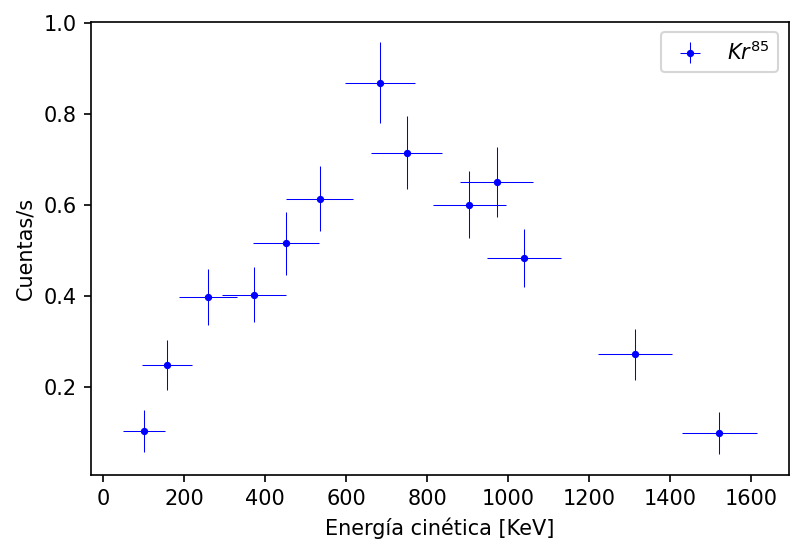

In [46]:

plt.errorbar(T_krypton,Cs_kripton_corr,s_Cs_krypton_corr,s_T_krypton,fmt='.',elinewidth=0.5,
             markersize=5,
             c='b', label='$Kr^{85}$')


plt.xlabel('Energía cinética [KeV]')
plt.ylabel('Cuentas/s')
plt.legend()
plt.show()

<img src="Kr85.png">

### Hagamos a continuación un diagrama de Fermi-Kurie para calcular la Q_exp:

In [47]:
# Calculo primero tau:

def tau(i,j,k):
    return ((i*k)/(137*j))

def s_tau(i,j,k,l,m):
    return np.sqrt(((m/137)**2) * (((k/j)**2+((i*l)/(j**2)))**2))

def F(i):
    return ((2*np.pi*i)/(1-np.exp(-2*np.pi*i)))

def s_F(i,j):
    return np.sqrt(((2*np.pi)**2) * (((1/(1-np.exp(-2*np.pi*i))) - ( (2*np.pi*i)/((1-np.exp(-2*np.pi*i))**2)))**2)*(j**2))



Tomando como variables para la funcion tau(i,j,k):

i=T_krypton

k=s_T_krypton

j=p_krypton

l=s_p_krypton

k=número atómico del nucleo hijo


In [48]:
tau_krypton = tau(T_krypton,p_krypton,37)
s_tau_krypton = s_tau(T_krypton,p_krypton,s_T_krypton,s_p_krypton,37)
F_krypton = F(tau_krypton)
s_F_krypton = s_F(tau_krypton,s_tau_krypton)


In [49]:
# De la teoría de Fermi de la desintegración beta tenemos:

def FK(i,j,k):
    return np.sqrt(i/((j**2)*k))

def s_FK(i,j,k,l,m,n):
    return np.sqrt(((l**2)/(4*i*k*(j**2))) + ((i*(m**2))/(k*(j**4))) + ((i*(n**2))/(4*(k**3)*(j**2))))

i=Cs_kripton_corr

l=s_Cs_krypton_corr

j=p_krypton

m=s_p_krypton

k=FK_krypton

n=s_FK_krypton

In [50]:
FK_krypton = FK(Cs_kripton_corr,p_krypton,F_krypton)
s_FK_krypton = s_FK(Cs_kripton_corr,p_krypton,F_krypton,s_Cs_krypton_corr,s_p_krypton,s_F_krypton)

In [51]:
def ajuste_lineal(x,a,b):
    return a*x + b

In [52]:
popt, pcov = curve_fit(ajuste_lineal,T_krypton,FK_krypton)
perr = np.sqrt(np.diag(pcov))
ajuste_K = popt
s_ajuste_K = perr

In [53]:
pendiente_K = ajuste_K[0]
s_pendiente_K = s_ajuste_K[0]

indep_K = ajuste_K[1]
s_indep_K = s_ajuste_K[1]

Q_krypton = (-indep_K/pendiente_K)

In [54]:
# Incertidumbre Q reacción:

def s_Q(i,j,k,l):
    return np.sqrt(((l/i)**2) + (((j*k)/(i**2))**2))

Los parametras para la funcion s_Q:

i=pendiente_K

j=indep_K

k=s_pendiente_K

l=s_indep_K

In [55]:
s_Q_krypton = s_Q(pendiente_K,indep_K,s_pendiente_K,s_indep_K)

print(Q_krypton)
print(s_Q_krypton)

1710.508064922301
116.49210880112355


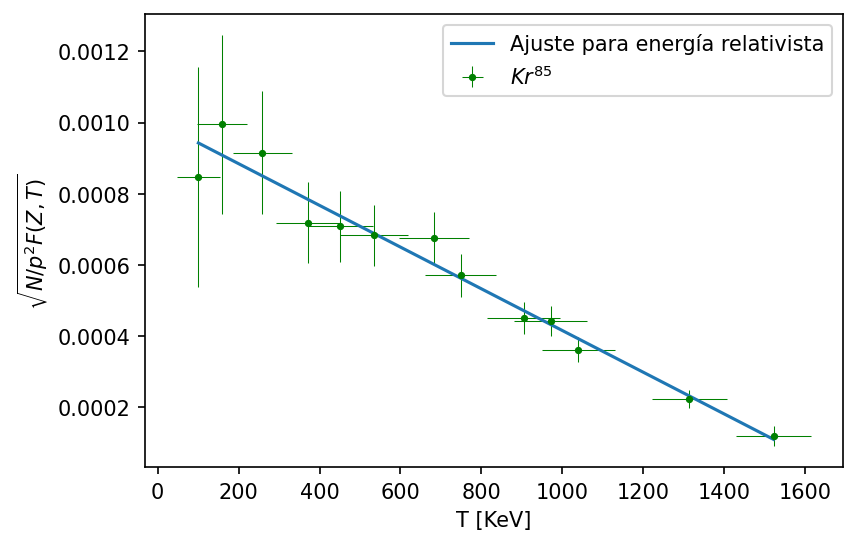

In [56]:
# Representamos el diagrama de Fermi-Kurie:
plt.errorbar(T_krypton,FK_krypton, s_FK_krypton, s_T_krypton,fmt='.',elinewidth=0.5,
             markersize=5,
             c='g', label='$Kr^{85}$')


plt.plot(T_krypton,ajuste_lineal(T_krypton,*ajuste_K), label='Ajuste para energía relativista')

plt.xlabel('T [KeV]')
plt.ylabel('$\sqrt{N/p^2F(Z,T)}$')

plt.legend()
plt.show()

## Radio 226

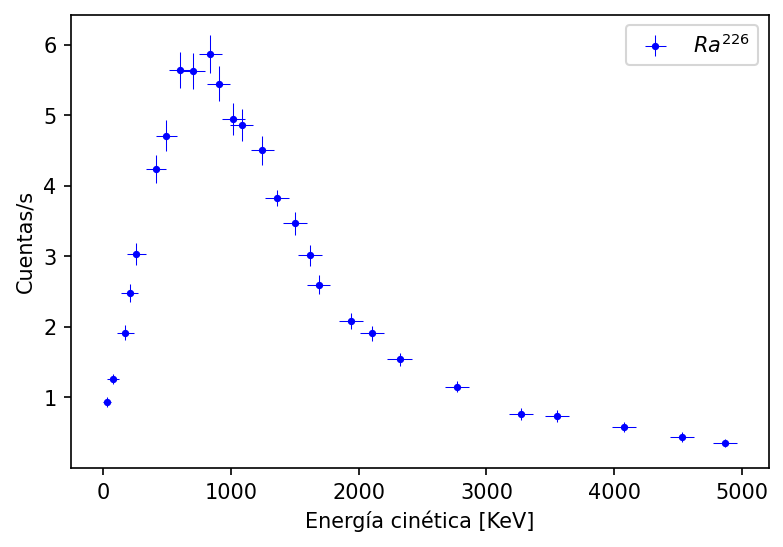

In [57]:
# Radio_226:


plt.errorbar(T_radio,Cs_radio_corr,s_Cs_radio_corr,s_T_radio,fmt='.',elinewidth=0.5,
             markersize=5,
             c='b', label='$Ra^{226}$')

plt.xlabel('Energía cinética [KeV]')
plt.ylabel('Cuentas/s')
plt.legend()
plt.show()

<img src="Ra226.png">

## Sodio 22

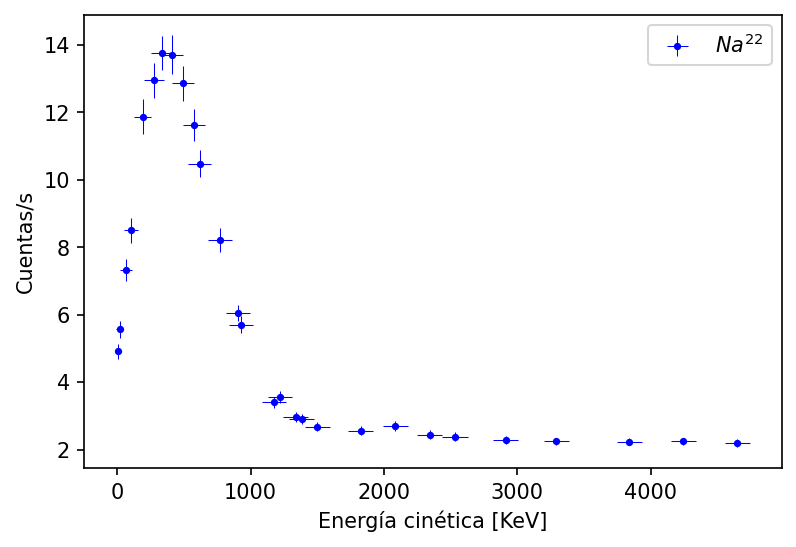

In [58]:
# Sodio_22:


plt.errorbar(T_sodio,Cs_sodio_corr,s_Cs_sodio_corr,s_T_sodio,fmt='.',elinewidth=0.5,
             markersize=5,
             c='b', label='$Na^{22}$')

plt.xlabel('Energía cinética [KeV]')
plt.ylabel('Cuentas/s')
plt.legend()
plt.show()

<img src="Na22.png">

### Hagamos a continuación un diagrama de Fermi-Kurie para calcular la Q_exp:

In [59]:
# Tenemos en cuenta que es desintegracion beta+ y cambiamos signo a tau

In [60]:
tau_sodio = -1 * tau(T_sodio,p_sodio,10)
s_tau_sodio = s_tau(T_sodio,p_sodio,s_T_sodio,s_p_sodio,10)
F_sodio = F(tau_sodio)
s_F_sodio = s_F(tau_sodio,s_tau_sodio)

In [61]:
FK_sodio = FK(Cs_sodio_corr,p_sodio,F_sodio)
s_FK_sodio = s_FK(Cs_sodio_corr,p_sodio,F_sodio,s_Cs_sodio_corr,s_p_sodio,s_F_sodio)

In [62]:
popt, pcov = curve_fit(ajuste_lineal,T_sodio,FK_sodio)
perr = np.sqrt(np.diag(pcov))
ajuste_sodio = popt
s_ajuste_sodio = perr

In [63]:
pendiente_sodio = ajuste_sodio[0]
s_pendiente_sodio = s_ajuste_sodio[0]

indep_sodio = ajuste_sodio[1]
s_indep_sodio = s_ajuste_sodio[1]

Q_sodio = (-indep_sodio/pendiente_sodio)
s_Q_sodio = s_Q(pendiente_sodio,indep_sodio,s_pendiente_sodio,s_indep_sodio)

print(Q_sodio)
print(s_Q_sodio)

3029.4538771321236
1058.9418923612666


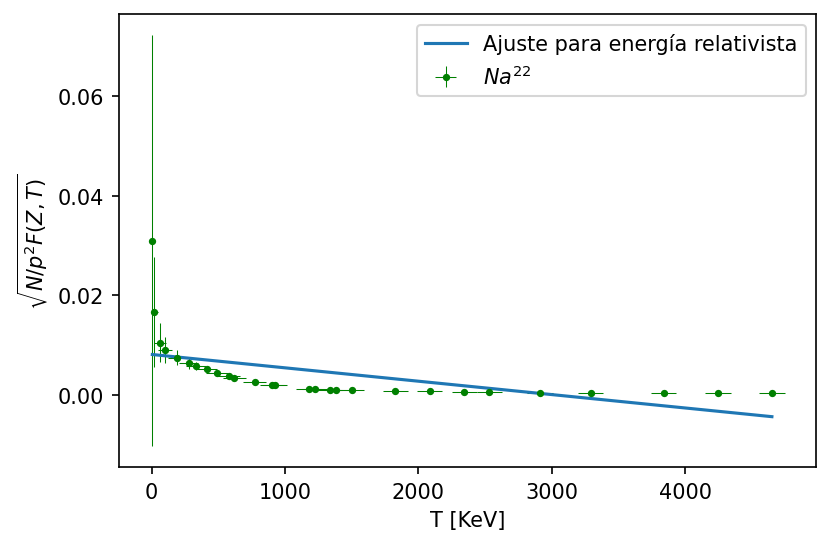

In [64]:
# Representamos el diagrama de Fermi-Kurie:
plt.errorbar(T_sodio,FK_sodio, s_FK_sodio, s_T_sodio,fmt='.',elinewidth=0.5,
             markersize=5,
             c='g', label='$Na^{22}$')


plt.plot(T_sodio,ajuste_lineal(T_sodio,*ajuste_sodio), label='Ajuste para energía relativista')

plt.xlabel('T [KeV]')
plt.ylabel('$\sqrt{N/p^2F(Z,T)}$')

plt.legend()
plt.show()

## Ajuste cuadrático

problemas con ecuacion ajuste!!

In [65]:
# Vamos a ajustar a una cuadrática de la forma:

$N(p)=Cp^2(Q-T)^2F(Z,T)$

In [66]:
# donde C(a) será una constante y Q(b) un parámetro libre

In [92]:
def ajuste_cuadr_N(x,a,b):
    c = T_sodio
    d = F_sodio
    return (x**2)*a*((b-c)**2)*d

Vamos a utilizar las siguientes variables:

x=momento

y=número de cuentas

c=Energía cinética

d=F(Z,T)


In [100]:
fit_params, pcov = scipy.optimize.curve_fit(ajuste_cuadr_N, p_sodio,Cs_sodio_corr,maxfev = 3000 )

In [101]:
y_fit = ajuste_cuadr_N(p_sodio, *fit_params)

In [105]:
fit_params

array([ 9.40798249e-24, -1.60284567e+08])

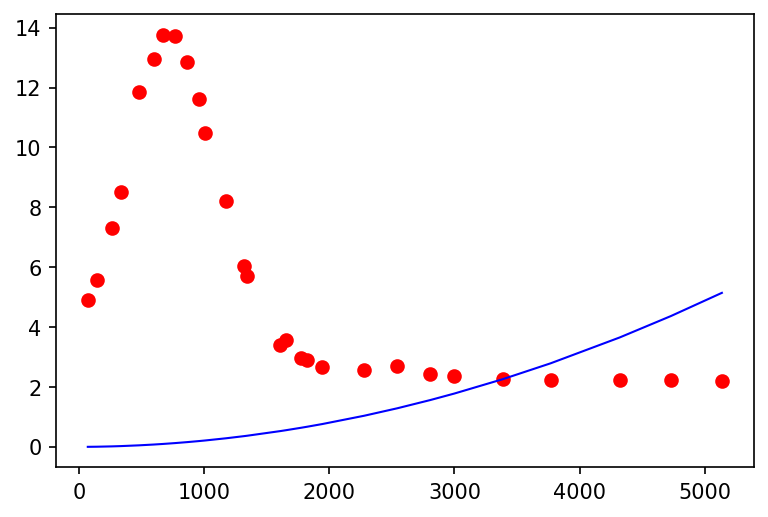

In [104]:
plt.scatter(p_sodio, Cs_sodio_corr, c='r', label='datos')

plt.plot(p_sodio, y_fit,
        'b',
        linewidth=1)
plt.show()